In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA


In [6]:
brent_data = pd.read_csv('../data/Copy of BrentOilPrices.csv', parse_dates=['Date'])
gdp_data = pd.read_csv('../data/GDP.csv')
inflation_data = pd.read_csv('../data/Global Dataset of Inflation.csv')

C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_7884\222067876.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data = pd.read_csv('../data/Copy of BrentOilPrices.csv', parse_dates=['Date'])


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 12585: invalid continuation byte

In [8]:
import pandas as pd

# Load Brent oil prices from the CSV file
brent_data = pd.read_csv('../data/Copy of BrentOilPrices.csv', parse_dates=['Date'])
brent_data.set_index('Date', inplace=True)

# Display the first few rows of the dataset
print(brent_data.head())

C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_7884\165443264.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data = pd.read_csv('../data/Copy of BrentOilPrices.csv', parse_dates=['Date'])


            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


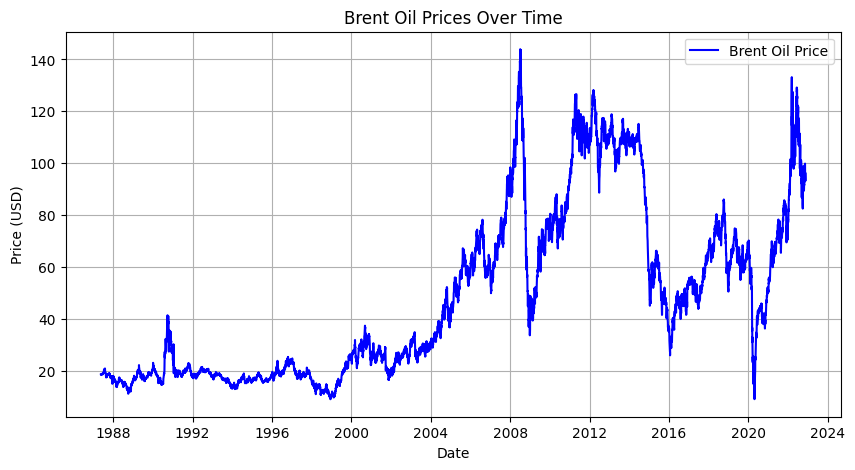

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(brent_data.index, brent_data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

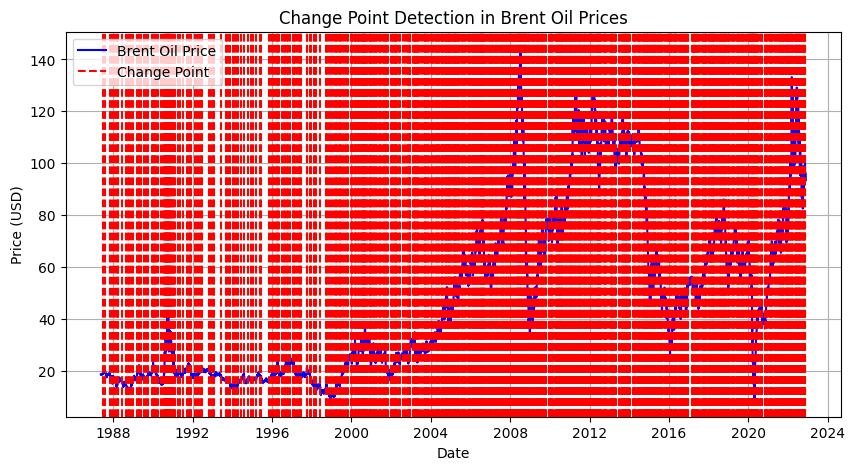

In [10]:
import ruptures as rpt

# Convert the price data to a NumPy array
price_array = brent_data['Price'].values

# Using the Pelt method from ruptures to detect change points
model = "l2"  # Model to use: "l2" for mean change
algo = rpt.Pelt(model=model).fit(price_array)
result = algo.predict(pen=5)  # Adjust penalty as needed

# Plotting the detected change points
plt.figure(figsize=(10, 5))
plt.plot(brent_data.index, brent_data['Price'], label='Brent Oil Price', color='blue')
for cp in result:
    plt.axvline(x=brent_data.index[cp-1], color='red', linestyle='--', label='Change Point' if cp == result[0] else "")
plt.title('Change Point Detection in Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

c:\Users\Admin.DESKTOP-M4R2VLU\weekTen\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\weekTen\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\weekTen\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Sat, 02 Nov 2024   AIC                          29093.899
Time:                        22:30:58   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

c:\Users\Admin.DESKTOP-M4R2VLU\weekTen\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin.DESKTOP-M4R2VLU\weekTen\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


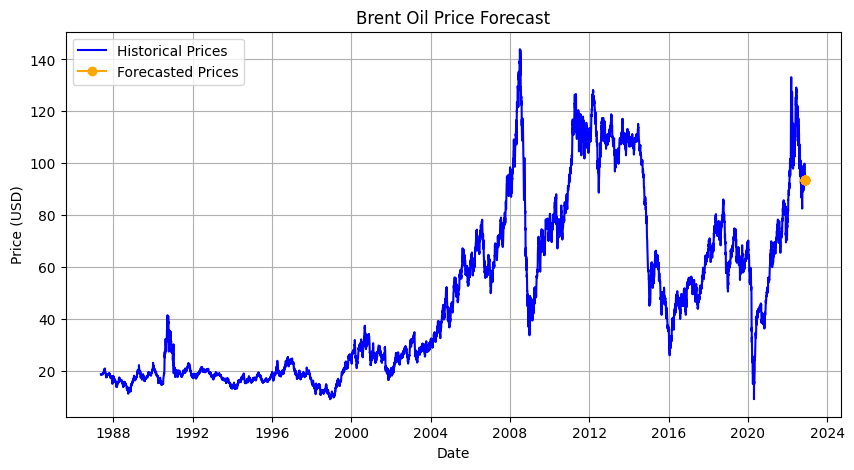

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (example parameters)
p = 1  # AR term
d = 1  # Differencing
q = 1  # MA term

# Fit the ARIMA model
model = ARIMA(brent_data['Price'], order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast future prices
forecast = model_fit.forecast(steps=10)
forecast_index = pd.date_range(start=brent_data.index[-1] + pd.Timedelta(days=1), periods=10)

# Plotting the forecast
plt.figure(figsize=(10, 5))
plt.plot(brent_data['Price'], label='Historical Prices', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Prices', color='orange', marker='o')
plt.title('Brent Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()